In [770]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
import sklearn

In [902]:
university_gen=pd.read_excel('universities_data.xlsx')

In [903]:
university_gen.shape #inspect the amount of column & row 

(1534, 145)

In [905]:
university_gen.info(len(university_gen)) #exam data type for following explanatory analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Dtype  
---   ------                                                                                  -----  
 0    ID number                                                                               int64  
 1    Name                                                                                    object 
 2    year                                                                                    int64  
 3    ZIP code                                                                                object 
 4    Highest degree offered                                                                  object 
 5    County name                                                                             object 
 6    Longitude location of institution                                     

/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_1546/2460565155.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


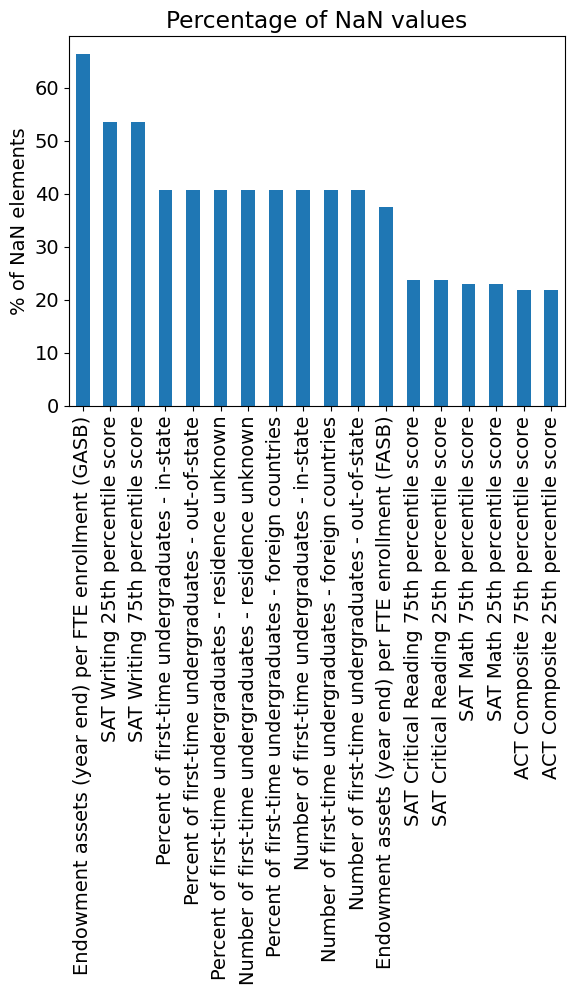

In [1000]:
percent_nan=university_gen.isna().sum()/len(university_gen)*100 # check for NaN value percentage, drop column if nan portion is above 20%
ax=percent_nan[percent_nan>20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values')
ax.set_ylabel('% of NaN elements')
percent_nan[percent_nan>20].count() # 18 columns that contains above 20% NaN value will be dropped.
plt.tight_layout()
plt.savefig('/Users/mac/Desktop/data_link/percent_of_nan.jpg',bbox_inches='tight',dpi=300)


In [925]:
col_off=percent_nan[percent_nan>20]
list_col_off=col_off.index.to_list()
new_university_gen=university_gen.drop(list_col_off,axis=1)# drop NaN>20% columns


In [926]:
interested_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [929]:
new_university_gen1=new_university_gen[interested_columns]# Contain only the columns that are relatd to the analysis
new_university_gen1.shape# Trim down column from 145 to 22

(1534, 22)

In [930]:
test=new_university_gen1[new_university_gen1['Total  enrollment'].isna()][['Name','Applicants total','Admissions total','Enrolled total','Total  enrollment']]
#Filter out the universities that has NaN value in Total enrollment.

In [931]:
a=new_university_gen1[new_university_gen1['Name']=='University of North Georgia'].index[0]
b=new_university_gen1[new_university_gen1['Name']=='Texas A & M University-Galveston'].index[0]
new_university_gen1.drop([a,b],axis=0)
new_university_gen1.rename(columns={'Total  enrollment':'enrollment_existing'},inplace=True)
#drop off universities that has NaN value in Total enrollment.

/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_1546/54265806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_university_gen1.rename(columns={'Total  enrollment':'enrollment_existing'},inplace=True)


In [594]:
col_var=new_university_gen1.select_dtypes(include=['int64','float64'])
#col_var
#For negative value checking, we need to identify columns that contains numeric values, only those numerical columns would be assessed.

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,2013,6142.0,5521.0,1104.0,5024.0,7182.0,21849.0,27441.0,5020.0,4439.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,2013,5689.0,4934.0,1773.0,18568.0,7206.0,22495.0,31687.0,18568.0,11961.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,2013,NaN,NaN,NaN,626.0,6870.0,NaN,NaN,631.0,323.0,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,2013,2054.0,1656.0,651.0,7376.0,9192.0,23466.0,35780.0,7376.0,4802.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,2013,10245.0,5251.0,1479.0,6076.0,8720.0,18286.0,25222.0,6075.0,5182.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2013,393.0,136.0,86.0,1889.0,5587.0,NaN,NaN,1877.0,875.0,...,1728.0,149.0,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN
1530,2013,3033.0,2158.0,127.0,504.0,31300.0,48717.0,48717.0,516.0,493.0,...,516.0,0.0,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0
1531,2013,NaN,NaN,NaN,445.0,NaN,NaN,NaN,458.0,1.0,...,383.0,75.0,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN
1532,2013,122.0,65.0,20.0,68.0,24222.0,38602.0,38602.0,66.0,66.0,...,66.0,0.0,66.0,0.0,52.0,52.0,NaN,46.0,54.0,54.0


In [599]:
for i in col_var:
    negative_l=[]
    y=any(i<0 for i in col_var[i])
    if y==True:
        negative_l.append(y)
print('There is {} negative value in the DataFrame '.format(len(negative_l)))
#For this dataset we do not need to deal with negative invalid values

There is 0 negative value in the DataFrame 


In [932]:
new_university_gen1.describe()
#Check if there is any inconsistency in the data, in 2013 there are 0 applicants, considering the data might yet to be available, converting 0 value to NaN value allows Panda procedures to skip NaN

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,enrollment_existing,Undergraduate enrollment,Graduate enrollment,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1534.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,1532.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5532.885117,1537.229112,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7242.649546,2765.197979,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1328.000000,46.750000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2487.500000,471.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6394.000000,1737.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,51333.000000,29874.000000,100.000000,100.000000,100.000000


In [367]:
total_zero=(new_university_gen1[new_university_gen1.iloc[0:,]==0]).count().sum()
print('This data contains {} zero value'.format(total_zero))
#Filter the rows that are value 0,turn out none of the rows have 0 value.

This data contains 395 zero value


In [372]:
new_university_gen1.replace(0,np.nan,inplace=True)
total_zero_new=(new_university_gen1[new_university_gen1.iloc[0:,]==0]).count().sum()
print('Now this data has {} zero value'.format(total_zero_new))

Now this data has 0 zero value


/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_1546/898828865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_university_gen1.replace(0,np.nan,inplace=True)


In [621]:
inconsist_check=new_university_gen1[['Name','Applicants total']].sort_values('Applicants total',ascending=False)
# Some university have comparitively low/high value of amount of applicants, to ensure there is no error from the data collection, exterior researches of the universities are conducted.In this case low/high value of applicants are valid.

In [950]:
new_university_gen1.columns

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'enrollment_existing',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total'],
      dtype='object')

In [976]:
def remove_spec_char(headers,chars): #remove special character in column name
    new_column=list()
    for header in headers:
        for char in chars:
            if char==' - ' or char=='/' or char==' ' or char=='-':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
        new_column.append(header)
    return new_column



In [977]:
headers=remove_spec_char(new_university_gen1.columns,["'",',',':',' - ','/',' ','-'])
headers


['Name',
 'year',
 'Highest_degree_offered',
 'Offers_Bachelors_degree',
 'Offers_Masters_degree',
 'Offers_Doctors_degree_research_scholarship',
 'Offers_Doctors_degree_professional_practice',
 'Applicants_total',
 'Admissions_total',
 'Enrolled_total',
 'Estimated_enrollment_total',
 'Tuition_and_fees_2013_14',
 'Total_price_for_in_state_students_living_on_campus_2013_14',
 'Total_price_for_out_of_state_students_living_on_campus_2013_14',
 'State_abbreviation',
 'Control_of_institution',
 'enrollment_existing',
 'Undergraduate_enrollment',
 'Graduate_enrollment',
 'Graduation_rate_Bachelor_degree_within_4_years_total',
 'Graduation_rate_Bachelor_degree_within_5_years_total',
 'Graduation_rate_Bachelor_degree_within_6_years_total']

In [978]:
list_after_lower_case=[] #convert all cases to lower 
for header in headers:
    header=header.casefold()
    list_after_lower_case.append(header)
new_university_gen1.columns=list_after_lower_case


In [979]:
new_university_gen1.rename(columns={'state_abbreviation':'state'},inplace=True)# Trim down column name


/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_1546/1206561246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_university_gen1.rename(columns={'state_abbreviation':'state'},inplace=True)# Trim down column name


In [980]:
new_university_gen1.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state', 'control_of_institution', 'enrollment_existing',
       'undergraduate_enrollment', 'graduate_enrollment',
       'graduation_rate_bachelor_degree_within_4_years_total',
       'graduation_rate_bachelor_degree_within_5_years_total',
       'graduation_rate_bachelor_degree_within_6_years_total'],
      dtype='object')

In [1001]:
top_20_applications=new_university_gen1[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)
#list out the top 20 universities that have the most applicants.

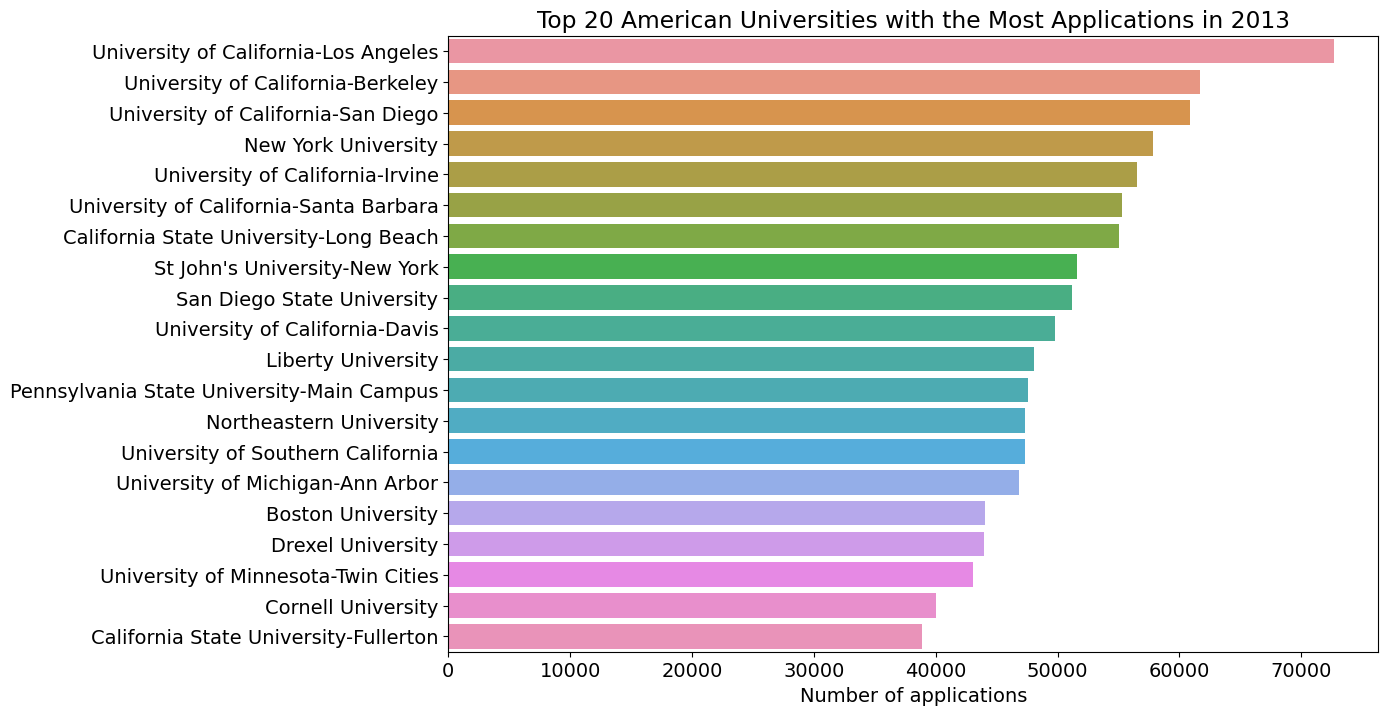

In [1003]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='applicants_total',y='name',data=top_20_applications)
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')
plt.ylabel('')
plt.savefig('/Users/mac/Desktop/data_link/top_20_applicant_uni.jpg',bbox_inches='tight',dpi=300)
#most applictions are in well known schools, yet are they the actual preferred ones? correlation between applicants & enrollment rate.

In [1013]:
new_university_gen1['acceptance_rate']=(new_university_gen1['admissions_total']/new_university_gen1['applicants_total']*100).round(2)
new_university_gen1['enrollment_rate']=(new_university_gen1['enrolled_total']/new_university_gen1['admissions_total']*100).round(2)
enrollment_rate=(new_university_gen1['enrolled_total']/new_university_gen1['admissions_total']*100).round(2)
acceptance_rate=(new_university_gen1['admissions_total']/new_university_gen1['applicants_total']*100).round(2)
accept_enroll=new_university_gen1['applicants_total'].corr(new_university_gen1['enrollment_rate'])
accept_enroll
print('There is a slight negative negative correlation {} between applicants and enrollment rate'.format(accept_enroll))

There is a slight negative negative correlation -0.1112954467708202 between applicants and enrollment rate


/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_1546/2663744270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_university_gen1['acceptance_rate']=(new_university_gen1['admissions_total']/new_university_gen1['applicants_total']*100).round(2)
/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_1546/2663744270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_university_gen1['enrollment_rate']=(new_university_gen1['enrolled_total']/new_university_gen1['admissions_total']*100).r

In [ ]:
test=new_university_gen1.corr() #check for valuable columns that have correlation with enrollment rate.
test['enrollment_rate'].sort_values(ascending=False)

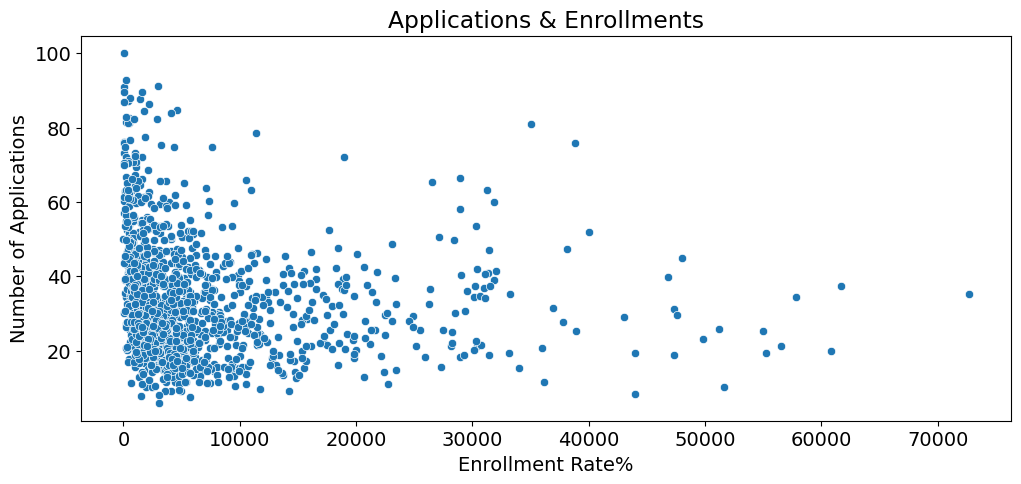

In [1045]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=new_university_gen1)
plt.title('Applications & Enrollments')
plt.xlabel('Enrollment Rate%')
plt.ylabel('Number of Applications')
new_university_gen1['applicants_total'].corr(new_university_gen1['enrollment_rate'])
# Higher number of Applicants does not indicate preference for the shcools, popularity is not related to preference for university, could be multiple applications just for insurance

plt.savefig('/Users/mac/Desktop/data_link/application & enrollment.jpg',bbox_inches='tight',dpi=300)


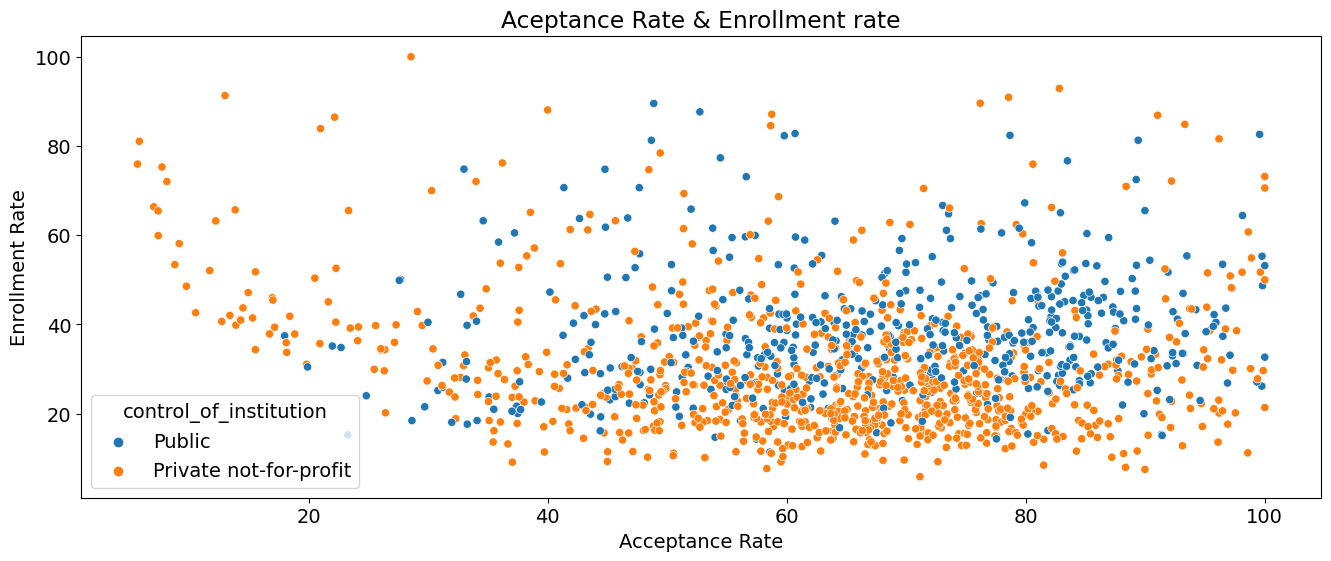

In [1046]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='acceptance_rate',y='enrollment_rate',data=new_university_gen1,hue='control_of_institution')
plt.title('Aceptance Rate & Enrollment rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Enrollment Rate')
new_university_gen1['acceptance_rate'].corr(new_university_gen1['enrollment_rate'])
#From the scatterplot, the enrollment rate vastly varies among public & private sector, there is no significant ccorrelation between acceptance(easiness to attend the university) & enrollment rate(preference), yet enrollment rate seems rather higher when acceptance rate is lower for Private/Non-Profit Sector
plt.savefig('/Users/mac/Desktop/data_link/acceptance_enrollment',bbox_inches='tight',dpi=300)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


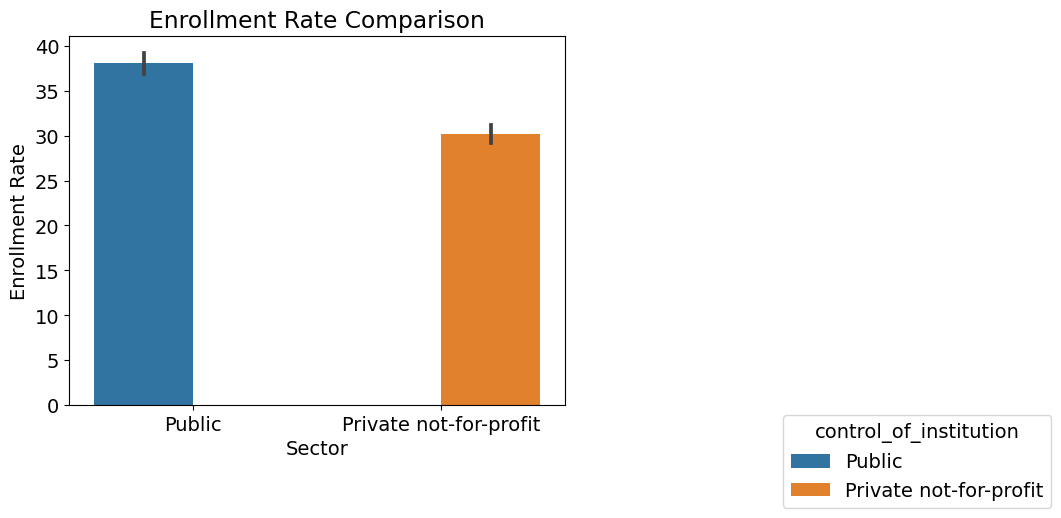

In [1047]:
fig,ax=plt.subplots()
control_enrollment=sns.barplot(x='control_of_institution',y='enrollment_rate',data=new_university_gen1,hue='control_of_institution')
sns.move_legend(control_enrollment, "upper right", bbox_to_anchor=(2, 0))
plt.title('Enrollment Rate Comparison')
plt.xlabel('Sector')
plt.ylabel('Enrollment Rate')
#Public universities have a higher enrollment rate comparing to Private/Non-profit universities, public school is more preferred.
sector_preference=new_university_gen1['control_of_institution'].corr(new_university_gen1['enrollment_rate'],method='kendall')
sector_preference
#Slight positive correlation between control_of_institution and university preference
plt.savefig('/Users/mac/Desktop/data_link/enrollment_comparison.jpg',bbox_inches='tight',dpi=300)
mean_public=new_university_gen1.loc[(new_university_gen1['control_of_institution'].str.startswith('Public'))]['enrollment_rate'].mean()
mean_private=new_university_gen1.loc[(new_university_gen1['control_of_institution'].str.startswith('Private'))]['enrollment_rate'].mean()

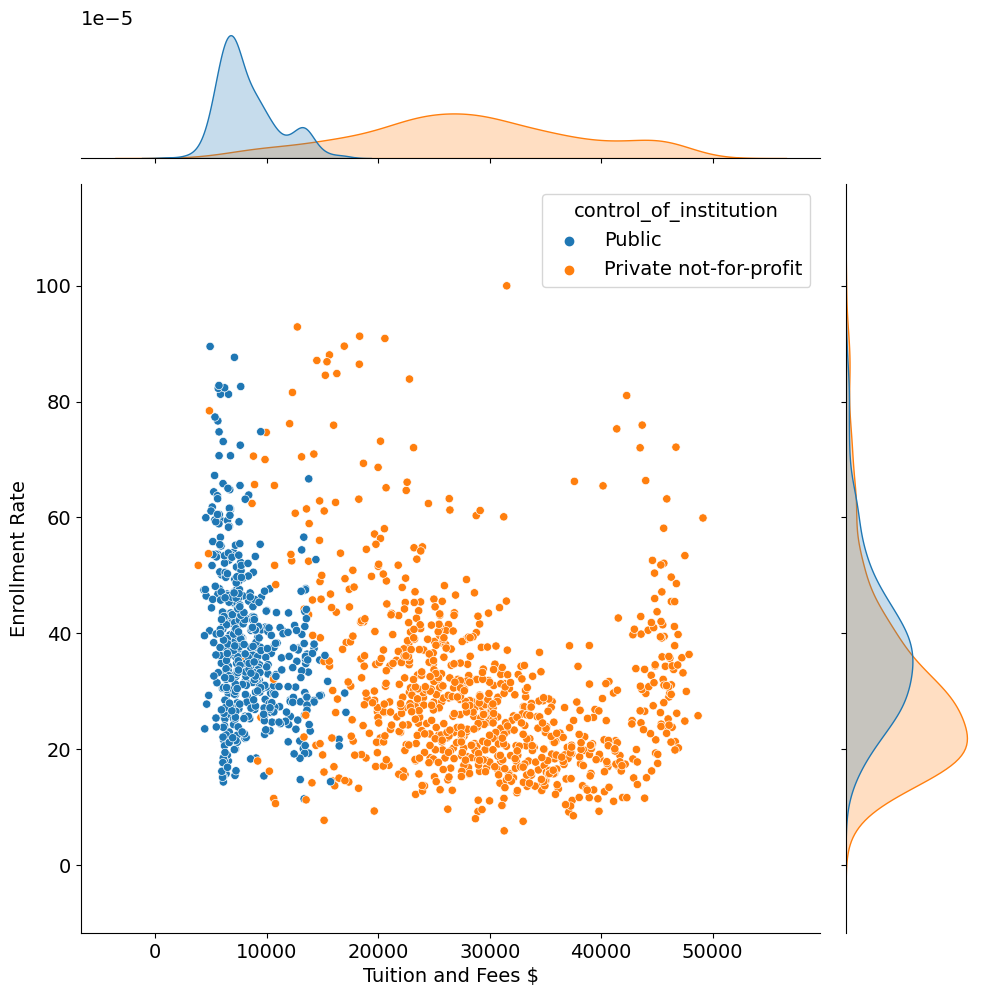

In [1048]:
ax=sns.jointplot(x=new_university_gen1['tuition_and_fees_2013_14'],y=new_university_gen1['enrollment_rate'],hue=new_university_gen1['control_of_institution'],height=10)
ax.set_axis_labels("Tuition and Fees $","Enrollment Rate")
new_university_gen1['tuition_and_fees_2013_14'].corr(new_university_gen1['enrollment_rate'])
plt.savefig('/Users/mac/Desktop/data_link/tuition_enrollment.jpg',bbox_inches='tight',dpi=300)
#Public universities are more affordable than majority of the private universities, thus we can assume tuition is one of the factors that leads to a higher preference in public school.
#In general tuition and fees have a negative correlation with prefernce of universities, the higher the tuition, the lower the enrollment rate, however, the relation is not as significant in private sector, enrollment rate as the concentration is lower, thus there are more factors influencing preference comparing to public universities.

-0.3612601817477561

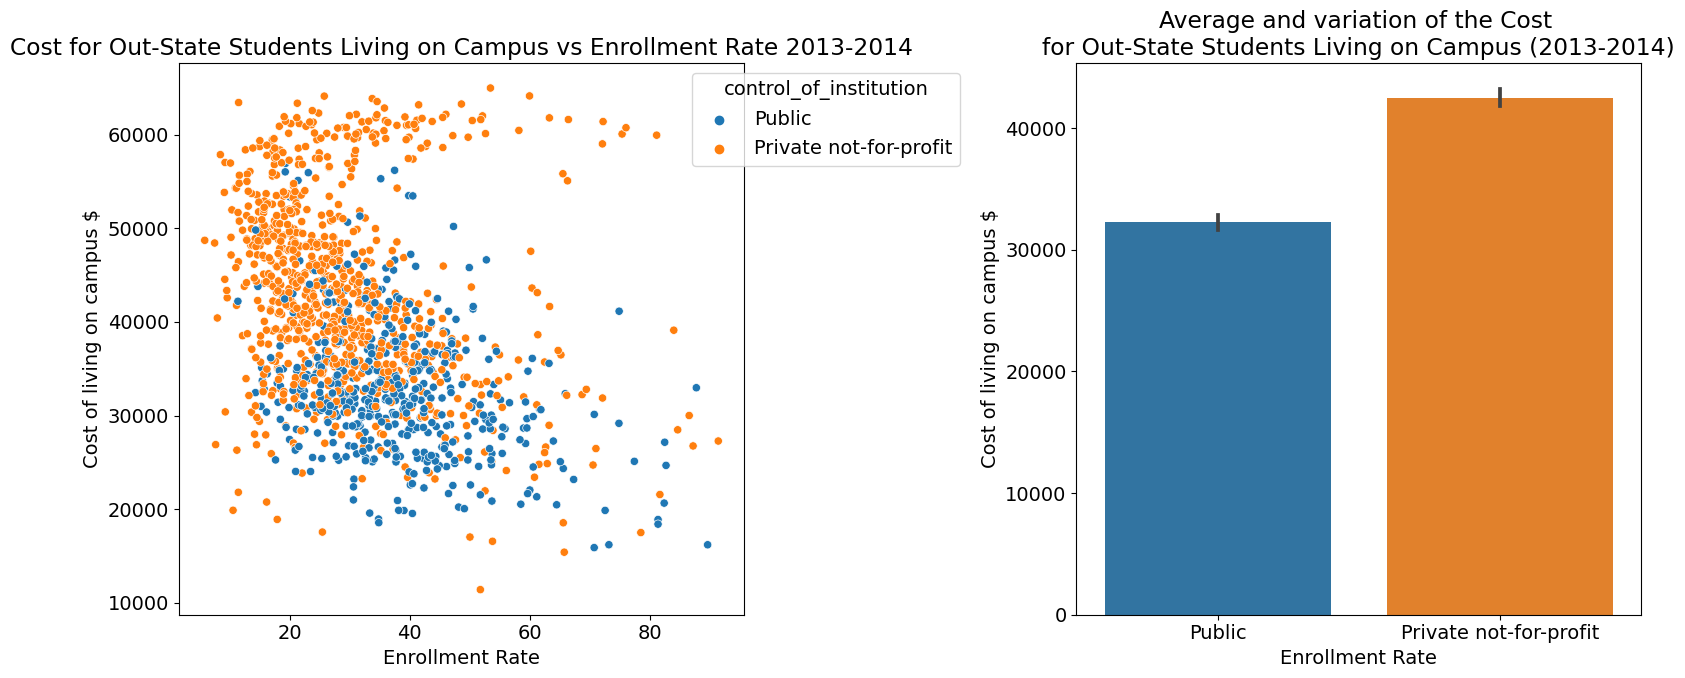

In [1049]:
plt.figure(figsize=(16,7)) #out-state students
ax1=plt.subplot(1,2,1)
sns.scatterplot(x=new_university_gen1.enrollment_rate,y=new_university_gen1.total_price_for_out_of_state_students_living_on_campus_2013_14,hue=new_university_gen1['control_of_institution'])
sns.move_legend(ax1, "upper right", bbox_to_anchor=(1.4, 1))
plt.title('Cost for Out-State Students Living on Campus vs Enrollment Rate 2013-2014')
plt.xlabel('Enrollment Rate')
plt.ylabel('Cost of living on campus $')
ax2=plt.subplot(1,2,2)
sns.barplot(x=new_university_gen1.control_of_institution,y=new_university_gen1.total_price_for_out_of_state_students_living_on_campus_2013_14)
plt.title('''Average and variation of the Cost 
for Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('Enrollment Rate')
plt.ylabel('Cost of living on campus $')
plt.tight_layout()
plt.savefig('/Users/mac/Desktop/data_link/cost_of_living_out.jpg',bbox_inches='tight',dpi=300)
new_university_gen1.enrollment_rate.corr(new_university_gen1.total_price_for_out_of_state_students_living_on_campus_2013_14)

#Cost of living for private university is higher than public ones for out-state students
#There is negative correlation between cost of living and preference of school, the more costly the expense is, the lower the enrollment rate, less influnce on private sector.


-0.37446987575873697

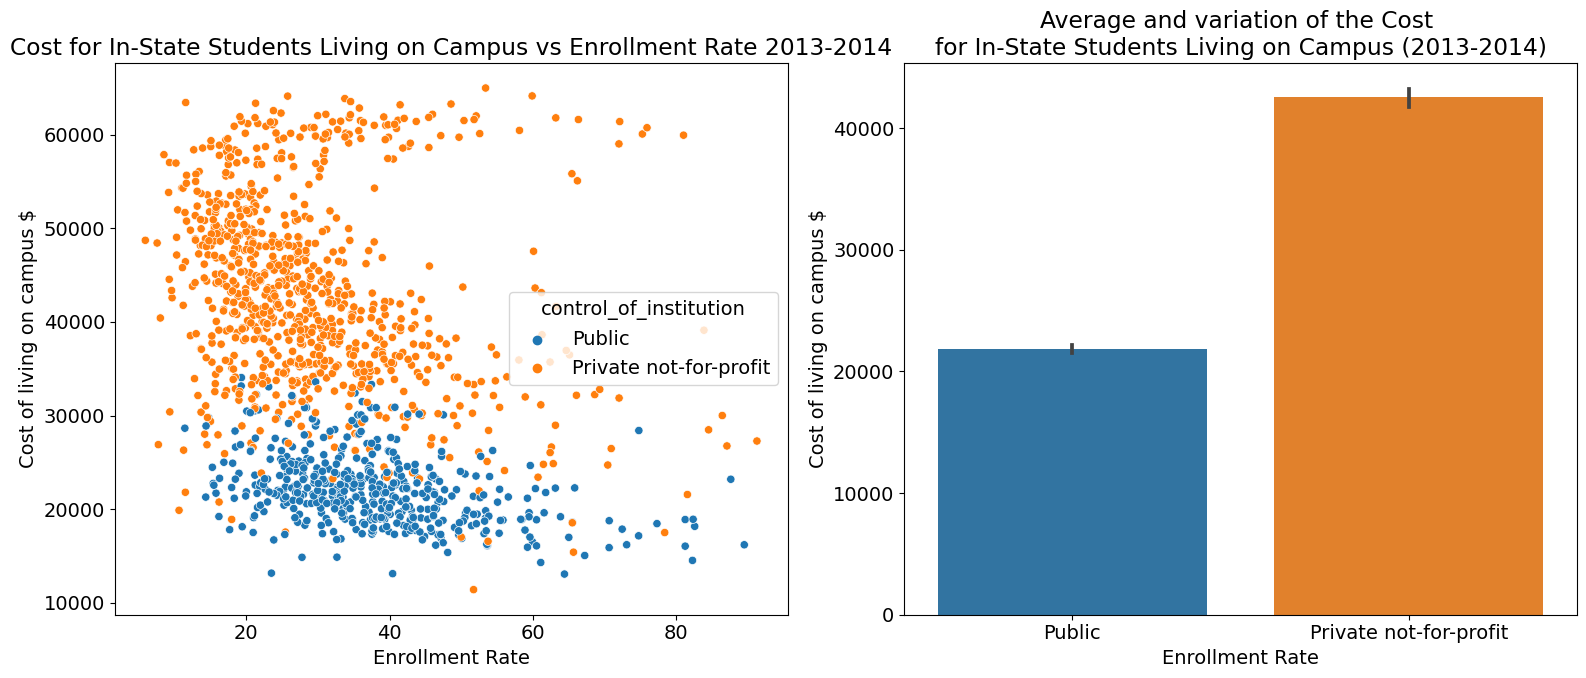

In [1050]:
plt.figure(figsize=(16,7))
ax3=plt.subplot(1,2,1)
sns.scatterplot(x=new_university_gen1.enrollment_rate,y=new_university_gen1.total_price_for_in_state_students_living_on_campus_2013_14,hue=new_university_gen1.control_of_institution)
plt.title('Cost for In-State Students Living on Campus vs Enrollment Rate 2013-2014')
plt.xlabel('Enrollment Rate')
plt.ylabel('Cost of living on campus $')
ax4=plt.subplot(1,2,2)
sns.barplot(x=new_university_gen1.control_of_institution,y=new_university_gen1.total_price_for_in_state_students_living_on_campus_2013_14)
plt.title('''Average and variation of the Cost 
for In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('Enrollment Rate')
plt.ylabel('Cost of living on campus $')
plt.tight_layout()
plt.savefig('/Users/mac/Desktop/data_link/cost_of_living_in.jpg',bbox_inches='tight',dpi=300)
new_university_gen1.enrollment_rate.corr(new_university_gen1.total_price_for_in_state_students_living_on_campus_2013_14)
#Simlilar correlation for In-State cost of living and , cost to live on campus for out-state students is significantly higher(nearly 2 times) than in-state students.
#Students, in general, prefer universities with affordable costs of on-campus living.

In [757]:
names=new_university_gen1.columns[new_university_gen1.columns.str.startswith('offers')]
degree=new_university_gen1[new_university_gen1[names]=='Yes'][names].count().sort_values(ascending=False)


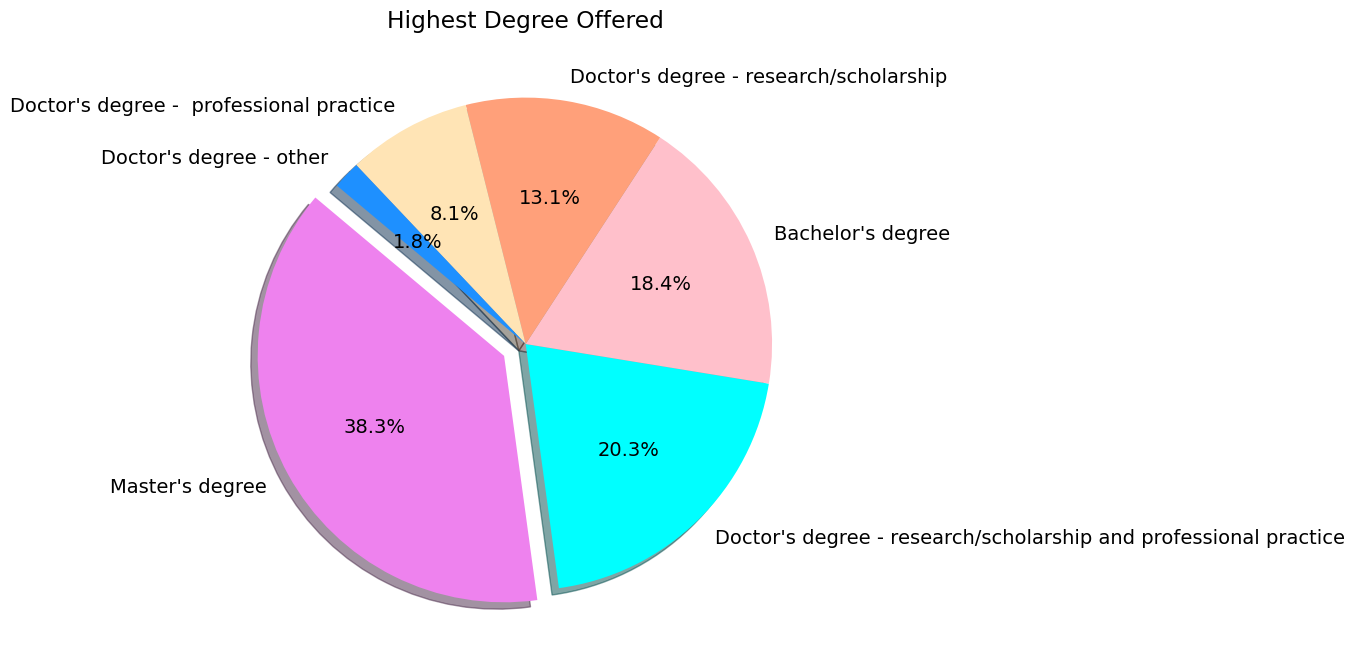

In [1069]:
hg_degree=new_university_gen1.highest_degree_offered.value_counts()
plt.figure(figsize=(16,8))
myexplode=[0.1,0,0,0,0,0]
plt.pie(hg_degree,labels=hg_degree.index,autopct='%.1f%%',startangle=140,colors= ['violet','aqua','pink','lightsalmon','moccasin','dodgerblue'],shadow=True,explode=myexplode)
plt.title('Highest Degree Offered')
plt.savefig('/Users/mac/Desktop/data_link/degree_offer.jpg',bbox_inches='tight',dpi=300)

In [825]:
degree_dict={"Bachelor":1,"Master":2,"Doctor":3}
new_degree=[]
for i in new_university_gen1.highest_degree_offered:
    for key in degree_dict.keys():
        if key in i:
            new_degree.append(degree_dict[key])
            
new_university_gen1['new_degree']=new_degree


/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_1546/1042278279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_university_gen1['new_degree']=new_degree


In [827]:
new_university_gen1.new_degree.corr(new_university_gen1['enrollment_rate'],method='kendall')
#Student do not necessarily look for a university with a offering of higehr continuning degree.

0.006411228586232023